This time, you will build a basic Neural Network model to predict Bitcoin price based on historical Data.
This notebook helps you to train a model but you can use it however you want.

In [ ]:
import os

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

CURDIR = os.path.dirname(os.getcwd())
DATADIR = os.path.join(CURDIR,  "data")
FIGDIR = os.path.join(CURDIR,  "figure")
%matplotlib inline

# Import Data
Our Data come from https://blockchain.info/.

Here, we load data into a Pandas DataFrame

In [98]:
df_blockchain = pd.read_csv(os.path.join(DATADIR, "df_blockchain.csv"), delimiter=";")

In [100]:
df_blockchain.head()

,Date,market-price,n-transactions-per-block,median-confirmation-time,hash-rate,difficulty,miners-revenue,trade-volume,blocks-size,avg-block-size,...,cost-per-transaction,n-unique-addresses,n-transactions,n-transactions-total,n-transactions-excluding-popular,output-volume,estimated-transaction-volume,estimated-transaction-volume-usd,total-bitcoins,market-cap
0,2011-09-13,6.88,45.908451,0.0,12.018816,1.777774e+06,52318.011503,0.0,592.190091,0.019009,...,7.666766,12622.0,6519.0,1497195.0,6519.0,358543.612114,58615.641320,403275.612279,7.257416e+06,5.022014e+07
1,2011-09-14,6.19,42.465753,0.0,13.263925,1.755425e+06,48306.468911,0.0,594.907367,0.018007,...,7.369408,12408.0,6200.0,1503780.0,6200.0,302619.024544,74521.484625,461287.989830,7.264662e+06,4.540930e+07
2,2011-09-15,5.92,41.500000,0.0,12.914875,1.755425e+06,60431.444952,0.0,597.554226,0.018240,...,7.333913,12988.0,6474.0,1509972.0,6474.0,299226.130646,79422.402932,470180.625359,7.272284e+06,4.322228e+07
3,2011-09-16,5.58,52.176471,0.0,10.995096,1.755425e+06,34345.021913,0.0,600.362512,0.022136,...,5.466341,12059.0,6209.0,1516381.0,6209.0,674606.861338,82696.853247,461448.441118,7.279040e+06,4.088136e+07
4,2011-09-17,5.18,40.701493,0.0,10.733308,1.755425e+06,36805.913687,0.0,602.995510,0.017116,...,6.489054,10988.0,5454.0,1522600.0,5454.0,354198.945778,68238.166521,353473.702578,7.285375e+06,3.801833e+07


# Explore Dataset

We already Explore dataset before, but you can draw other plots to analyse data if you want.

Idea : you can use pandas_profiling 

```python
from pandas_profiling import ProfileReport
ProfileReport(df)
```

In [ ]:
# Your Code Here

In [118]:
# get only some columns (You can add more columns to analyse results)
columns = ["market-price"]
dataset = df_blockchain[columns]

# Data scaling

Here we scale price between 0 and 1, this well help the optimization algorithm converge faster.

See the following figure (source : Andrew Ng https://www.andrewng.org ) :

![alt text](../data/feature-scaling.png "Title")



In [119]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.values.reshape(-1,len(columns)))

In [120]:
dataset.shape

(3170, 2)

# Split Data

split data into train/valid/test set as follow :

- test set size : rnn_size + predicition_days(30)
- train set size : 80% of the rest
- valid set size : the rest

In [121]:
# split data
prediction_days = 30
rnn_size = 5
test_size = prediction_days + rnn_size

#Your Code Here
train_size = 
valid_size = 

data_train = dataset[:train_size]
data_valid = dataset[train_size : train_size + valid_size]
data_test = dataset[train_size + valid_size : train_size + valid_size + 30]

In [131]:
data_train.shape

(2508, 2)

# Process data (Making sequences)

here we process data before training.

LSTM layer as an input layer expects the data to be 3 dimensions, we will use 'process_data' function to split data into sequences of a fixed length (rnn_size).

The neural network is expecting to have an input's shap of [batch_size, rnn_size, nb_features]

In [139]:
def process_data(data, rnn_size=rnn_size, target_id=0, columns_size=len(columns)):
    X = []
    y = []
    for i in range(len(data)-rnn_size):
        X.append(data[i:i+rnn_size,:])
        y.append(data[i+rnn_size,0])
    return np.array(X).astype(np.float32).reshape((-1,rnn_size,columns_size)), np.array(y).astype(np.float32)

In [140]:
# process data for RNN
X_train, y_train = process_data(data_train)
X_val, y_val = process_data(data_valid)
X_test, y_test = process_data(data_test)

In [141]:
X_train.shape

(2503, 5, 2)

In [170]:
X_val.shape

(622, 5, 2)

In [171]:
X_test.shape

(25, 5, 2)

# Deep Learning Model

Here we initialize the model using Keras.

Here we propose to code a basic neural network LSTM + Dense, but you are free to use any architecture.

In [142]:
# neural network model

# Initialising the model
regressor = Sequential()

# Adding the input/LSTM layer 
#Your Code Here
regressor.add()

# Adding the output layer
#Your Code Here
regressor.add()

#Compiling the Recurrent Neural Network with adam optimier and 'mean_absolute_error' as loss function
regressor.compile()

In [143]:
#Fitting the Recurrent Neural Network
regressor.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 32, epochs = 50)

Train on 2503 samples, validate on 622 samples
Epoch 1/50
2503/2503 [==============================] - 1s 357us/step - loss: 0.0923 - val_loss: 0.2504
Epoch 2/50
2503/2503 [==============================] - 0s 191us/step - loss: 0.0476 - val_loss: 0.1891
Epoch 3/50
2503/2503 [==============================] - 0s 191us/step - loss: 0.0428 - val_loss: 0.0551
Epoch 4/50
2503/2503 [==============================] - 0s 185us/step - loss: 0.0256 - val_loss: 0.0127
Epoch 5/50
2503/2503 [==============================] - 1s 209us/step - loss: 0.0171 - val_loss: 0.0236
Epoch 6/50
2503/2503 [==============================] - 0s 182us/step - loss: 0.0191 - val_loss: 0.0101
Epoch 7/50
2503/2503 [==============================] - 0s 190us/step - loss: 0.0284 - val_loss: 0.0217
Epoch 8/50
2503/2503 [==============================] - 0s 187us/step - loss: 0.0143 - val_loss: 0.0102
Epoch 9/50
2503/2503 [==============================] - 0s 192us/step - loss: 0.0233 - val_loss: 0.0122
Epoch 10/50
2503/

# Evaluation

In [144]:
# mae score (using scaled price and regressor attir)
regressor.evaluate(X_test,y_test)

25/25 [==============================] - 0s 246us/step


0.022106008604168892

In [178]:
#implement mae score function

In [180]:
# mae score (real price)
y_pred = regressor.predict(X_test)
y_pred_inverse = scaler.inverse_transform(np.concatenate([y_pred, data_test[-len(y_pred):,1:]], axis=1))
y_test_inverse = scaler.inverse_transform(data_test.reshape(-1,len(columns)))

print("mae score : ", mae_score(y_test_inverse[rnn_size:], y_pred_inverse))

mae score :  213.0754130720132


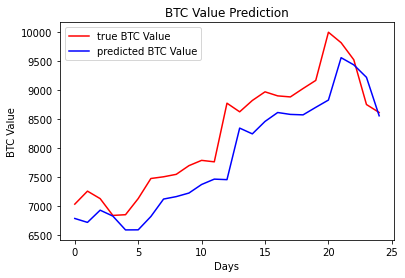

In [172]:
#Graphs for predicted values
plt.plot(y_test_inverse[rnn_size:,0], color = 'red', label = 'true BTC Value')
plt.plot(y_pred_inverse[:,0], color = 'blue', label = 'predicted BTC Value')
plt.title('BTC Value Prediction')
plt.xlabel('Days')
plt.ylabel('BTC Value')
plt.legend()
plt.show()

# If you this far, you can : 
- Test other neural network models
- Test other optimizer
- Compare result between Arima and RNN models
- Find a way to choose most important variables
- ...